### NLP Assignment 2
#### January 2020

###### Name: 
###### Index No.: 

### Answer (a)

This sention will load the dataset, remove symbols and filter alphanumeric words, tokenize, identify singlish or not and finally create 2 different CSV files for each

In [635]:
import pandas as pd

In [636]:
#importing the dataset
df = pd.read_csv("./Sinhala_Singlish_Hate_Speech.csv/Sinhala_Singlish_Hate_Speech.csv")
df.head()

PhraseNo                                             Phrase IsHateSpeech
0         1  ‡∂∏‡∑ö ‡∂∂‡∑ê‡∂Ω‡∑ä‡∂Ω‡∑í ‡∂ö‡∑ú‡∂ß‡∑í‡∂±‡∑ä‡∂ú‡∑ö ‡∂ú‡∑î ‡∂ö‡∂±‡∂ö‡∑ú‡∂ß ‡∂Ö‡∂¥‡∑Ñ‡∑É‡∑î‡∑Ä‡∂ö‡∑ä ‡∂Ø‡∑ê‡∂±‡∑î‡∂±‡∑ô ‡∂±‡∑ê...          YES
1         2  ‡∂∏‡∂±‡∑ä ‡∂ä‡∂∫‡∑ö ‡∂∏‡∑î‡∑É‡∑ä‡∂Ω‡∑í‡∂∏‡∑ä ‡∂©‡∑ë‡∂Ω‡∑ä ‡∂ë‡∂ö‡∂ö‡∑ä ‡∂ë‡∂ö‡∑ä‡∂ö ‡∑É‡∑ô‡∂Ω‡∑ä‡∑Ü‡∑í‡∂∫‡∂ö‡∑ä ‡∂ú‡∂≠‡∑ä‡∂≠...          YES
2         3                           ‡∑É‡∂Ç‡∑Ñ‡∑í‡∂Ø‡∑í‡∂∫‡∑è‡∑Ä‡∂ß ‡∂Ö‡∑Ä‡∑î‡∂Ω‡∂ö‡∑ä ‡∑Ä‡∑ô‡∂∫‡∑í ‡∂Ø           NO
3         4  .‡∂ö‡∂ß‡∑í‡∂±‡∑ä ‡∂¥‡∑î‡∂ª‡∑É‡∑è‡∂ª‡∂∏‡∑ä ‡∂Ø‡∑ú‡∂©‡∂± ‡∂Ö‡∂¥‡∑í ‡∑É‡∑í‡∂Ç‡∑Ñ‡∂Ω‡∂∫‡∑ú ‡∑Ä‡∑í‡∂Ø‡∑í‡∂∫‡∂ß ‡∂Ω‡∑ê‡∂¢‡∑ä‡∂¢‡∑è...          YES
4         5  ‡∂∏‡∂†‡∂±‡∑ä ‡∂î‡∂∫ ‡∂∏‡∂ú‡∑î‡∂Ω ‡∂±‡∑Ä‡∂≠‡∑ä‡∂≠‡∂Ω‡∑è ‡∂ö‡∑ú‡∂±‡∑ä‡∂Ø‡∂ö‡∑ä ‡∂≠‡∑í‡∂∫‡∑ô‡∂±‡∑Ä‡∑è‡∂±‡∂∏‡∑ä ‡∂¥‡∑î‡∂Ω‡∑î‡∑Ä‡∂±...          YES

In [637]:
#function to remove non-alphanumeric characters
symbols = ["~", "`", "!", "@", "#", "$", "%", "^", "&", "*", "(", ")", "_", "-", "+", "=", ";", ":", '\"', "\'", "<", ",", ">", ".", "?", "/", "{", "[", "}", "]", "|", "\\"]
def removeNonAlphaNumeric(string):
    formattedStr = string
    for symbol in symbols:
        formattedStr = formattedStr.replace(symbol, ' ')
    return formattedStr        

In [638]:
df["cleaned_phrase"] = df.Phrase.apply(removeNonAlphaNumeric)

### Note: Did not filtered html tags since they were not present in the dataset. Only the symbols were removed

In [639]:
# function to tokenize a string using spaces since symbols are removed
def tokenize(string):
    tokens = string.split(" ")
    finalizedTokens = []
    for t in tokens:
        if(len(t) != 0):
            finalizedTokens.append(t)
    return finalizedTokens

In [640]:
tokens = []

In [641]:
# generate tokens
for index, row in df.iterrows():
    tokens.append(tokenize(row['cleaned_phrase']))

In [642]:
tokens

[['‡∂∏‡∑ö',
  '‡∂∂‡∑ê‡∂Ω‡∑ä‡∂Ω‡∑í',
  '‡∂ö‡∑ú‡∂ß‡∑í‡∂±‡∑ä‡∂ú‡∑ö',
  '‡∂ú‡∑î',
  '‡∂ö‡∂±‡∂ö‡∑ú‡∂ß',
  '‡∂Ö‡∂¥‡∑Ñ‡∑É‡∑î‡∑Ä‡∂ö‡∑ä',
  '‡∂Ø‡∑ê‡∂±‡∑î‡∂±‡∑ô',
  '‡∂±‡∑ê‡∂Ø‡∑ä‡∂Ø',
  '‡∂Ø‡∂±‡∑ä',
  '‡∂±‡∑ê‡∑Ñ‡∑ê',
  '‡∂î‡∂ö‡∑í‡∂ß',
  '‡∂∏‡∑í‡∂±‡∑í‡∑Ñ‡∑è',
  '‡∂∏‡∑ê‡∂ª‡∑î‡∂±‡∂∏',
  '‡∂Ø‡∑ê‡∂±‡∑î‡∂±',
  '‡∂Ø‡∑î‡∂ö‡∂ß',
  '‡∑Ä‡∂©‡∑è',
  '‡∂Ø‡∑Ñ‡∑É‡∑ä',
  '‡∂ú‡∑î‡∂±‡∂∫‡∂ö',
  '‡∂Ø‡∑î‡∂ö‡∂ö‡∑ä',
  '‡∂Ø‡∑ê‡∂±‡∑ô‡∂±‡∑Ä‡∑è',
  '‡∂â‡∑É‡∑ä‡∑É‡∂ª‡∑Ñ‡∂ß',
  '‡∂ã‡∂¥‡∑É‡∂∏‡∑ä‡∂¥‡∂Ø‡∑è‡∑Ä',
  '‡∂≠‡∑í‡∂∫‡∂±',
  '‡∂∑‡∑í‡∂ö‡∑ä‡∑É‡∑î‡∑Ä‡∂ö‡∑ä',
  '‡∑Ñ‡∑í‡∂ª‡∑ö',
  '‡∂∫‡∑ê‡∑Ä‡∑î‡∑Ä‡∂ß',
  '‡∂î‡∂ö‡∑í',
  '‡∑Ä‡∑ê‡∂©‡∑í‡∂∫‡∑ô‡∂±‡∑ä‡∂∏',
  '‡∂Ü‡∂Ø‡∂ª‡∑ö',
  '‡∂ö‡∑ô‡∂±‡∑ô‡∂ö‡∑ä',
  '‡∂î‡∂ö‡∑í‡∂ß',
  '‡∂±‡∑ê‡∂≠‡∑í',
  '‡∑Ä‡∑ô‡∂±‡∑Ä‡∑è',
  '‡∑Ä‡∑ê‡∂©‡∑í',
  '‡∂ö‡∂Ω‡∑ä',
  '‡∂±‡∑ú‡∂ú‡∑í‡∑Ñ‡∑í‡∂±‡∑ä'],
 ['‡∂∏‡∂±‡∑ä',
  '‡∂ä‡∂∫‡∑ö',
  '‡∂∏‡∑î‡∑É‡∑ä‡∂Ω‡∑í‡∂∏‡∑ä',
  '‡∂©‡∑ë‡∂Ω‡∑ä',
  '‡∂ë‡∂ö‡∂ö‡∑ä',
  '‡∂ë‡∂ö‡∑ä‡∂ö',
  '‡∑É‡∑ô‡∂Ω‡∑ä‡∑Ü‡∑í‡∂∫‡∂ö‡∑ä',
  '‡∂ú‡∂≠‡∑ä‡∂≠‡∑è',
  '‡∑É‡∑Ñ‡∂¢‡∑ì‡∑Ä‡∂±‡∑ö',
  '‡∂ª‡∑ê‡∂ö‡∂ú‡∑ô‡∂±',
  '

In [643]:
# function to identify a given string is english or not
def isEnglish(s):
    if(str.isdigit(s)):
        return False
    try:
        s.encode(encoding='utf-8').decode('ascii')
    except UnicodeDecodeError:
        return False
    else:
        return True

In [644]:
# function to identify a given list of tokens are singlish or  not
def isSinglish(tokens):
    for token in tokens:
        if(isEnglish(token)):
            return True
    return False
        

In [646]:
# function to get the unique token of a given singlish token
def getUniqueSinglishTokens(token):
    convertedToken = token.lower()
    # get the root version
    return convertedToken

In [649]:
cleaned_tokens = []
for sentTokens in tokens:
    if(isSinglish(sentTokens)):
        temp = []
        for token in sentTokens:
            if(isEnglish(token)):
                temp.append(getUniqueSinglishTokens(token))
            else:
                temp.append(token)
        cleaned_tokens.append(temp)
    else:
        cleaned_tokens.append(sentTokens)
        

In [650]:
cleaned_tokens

[['‡∂∏‡∑ö',
  '‡∂∂‡∑ê‡∂Ω‡∑ä‡∂Ω‡∑í',
  '‡∂ö‡∑ú‡∂ß‡∑í‡∂±‡∑ä‡∂ú‡∑ö',
  '‡∂ú‡∑î',
  '‡∂ö‡∂±‡∂ö‡∑ú‡∂ß',
  '‡∂Ö‡∂¥‡∑Ñ‡∑É‡∑î‡∑Ä‡∂ö‡∑ä',
  '‡∂Ø‡∑ê‡∂±‡∑î‡∂±‡∑ô',
  '‡∂±‡∑ê‡∂Ø‡∑ä‡∂Ø',
  '‡∂Ø‡∂±‡∑ä',
  '‡∂±‡∑ê‡∑Ñ‡∑ê',
  '‡∂î‡∂ö‡∑í‡∂ß',
  '‡∂∏‡∑í‡∂±‡∑í‡∑Ñ‡∑è',
  '‡∂∏‡∑ê‡∂ª‡∑î‡∂±‡∂∏',
  '‡∂Ø‡∑ê‡∂±‡∑î‡∂±',
  '‡∂Ø‡∑î‡∂ö‡∂ß',
  '‡∑Ä‡∂©‡∑è',
  '‡∂Ø‡∑Ñ‡∑É‡∑ä',
  '‡∂ú‡∑î‡∂±‡∂∫‡∂ö',
  '‡∂Ø‡∑î‡∂ö‡∂ö‡∑ä',
  '‡∂Ø‡∑ê‡∂±‡∑ô‡∂±‡∑Ä‡∑è',
  '‡∂â‡∑É‡∑ä‡∑É‡∂ª‡∑Ñ‡∂ß',
  '‡∂ã‡∂¥‡∑É‡∂∏‡∑ä‡∂¥‡∂Ø‡∑è‡∑Ä',
  '‡∂≠‡∑í‡∂∫‡∂±',
  '‡∂∑‡∑í‡∂ö‡∑ä‡∑É‡∑î‡∑Ä‡∂ö‡∑ä',
  '‡∑Ñ‡∑í‡∂ª‡∑ö',
  '‡∂∫‡∑ê‡∑Ä‡∑î‡∑Ä‡∂ß',
  '‡∂î‡∂ö‡∑í',
  '‡∑Ä‡∑ê‡∂©‡∑í‡∂∫‡∑ô‡∂±‡∑ä‡∂∏',
  '‡∂Ü‡∂Ø‡∂ª‡∑ö',
  '‡∂ö‡∑ô‡∂±‡∑ô‡∂ö‡∑ä',
  '‡∂î‡∂ö‡∑í‡∂ß',
  '‡∂±‡∑ê‡∂≠‡∑í',
  '‡∑Ä‡∑ô‡∂±‡∑Ä‡∑è',
  '‡∑Ä‡∑ê‡∂©‡∑í',
  '‡∂ö‡∂Ω‡∑ä',
  '‡∂±‡∑ú‡∂ú‡∑í‡∑Ñ‡∑í‡∂±‡∑ä'],
 ['‡∂∏‡∂±‡∑ä',
  '‡∂ä‡∂∫‡∑ö',
  '‡∂∏‡∑î‡∑É‡∑ä‡∂Ω‡∑í‡∂∏‡∑ä',
  '‡∂©‡∑ë‡∂Ω‡∑ä',
  '‡∂ë‡∂ö‡∂ö‡∑ä',
  '‡∂ë‡∂ö‡∑ä‡∂ö',
  '‡∑É‡∑ô‡∂Ω‡∑ä‡∑Ü‡∑í‡∂∫‡∂ö‡∑ä',
  '‡∂ú‡∂≠‡∑ä‡∂≠‡∑è',
  '‡∑É‡∑Ñ‡∂¢‡∑ì‡∑Ä‡∂±‡∑ö',
  '‡∂ª‡∑ê‡∂ö‡∂ú‡∑ô‡∂±',
  '

In [651]:
sinhala_tokens_set = []
singlish_tokens_set = []

In [652]:
for tokenSet in cleaned_tokens:
    if(isSinglish(tokenSet)):
        singlish_tokens_set.append(tokenSet)
    else:
        sinhala_tokens_set.append(tokenSet)

In [653]:
sinhala_tokens_set

[['‡∂∏‡∑ö',
  '‡∂∂‡∑ê‡∂Ω‡∑ä‡∂Ω‡∑í',
  '‡∂ö‡∑ú‡∂ß‡∑í‡∂±‡∑ä‡∂ú‡∑ö',
  '‡∂ú‡∑î',
  '‡∂ö‡∂±‡∂ö‡∑ú‡∂ß',
  '‡∂Ö‡∂¥‡∑Ñ‡∑É‡∑î‡∑Ä‡∂ö‡∑ä',
  '‡∂Ø‡∑ê‡∂±‡∑î‡∂±‡∑ô',
  '‡∂±‡∑ê‡∂Ø‡∑ä‡∂Ø',
  '‡∂Ø‡∂±‡∑ä',
  '‡∂±‡∑ê‡∑Ñ‡∑ê',
  '‡∂î‡∂ö‡∑í‡∂ß',
  '‡∂∏‡∑í‡∂±‡∑í‡∑Ñ‡∑è',
  '‡∂∏‡∑ê‡∂ª‡∑î‡∂±‡∂∏',
  '‡∂Ø‡∑ê‡∂±‡∑î‡∂±',
  '‡∂Ø‡∑î‡∂ö‡∂ß',
  '‡∑Ä‡∂©‡∑è',
  '‡∂Ø‡∑Ñ‡∑É‡∑ä',
  '‡∂ú‡∑î‡∂±‡∂∫‡∂ö',
  '‡∂Ø‡∑î‡∂ö‡∂ö‡∑ä',
  '‡∂Ø‡∑ê‡∂±‡∑ô‡∂±‡∑Ä‡∑è',
  '‡∂â‡∑É‡∑ä‡∑É‡∂ª‡∑Ñ‡∂ß',
  '‡∂ã‡∂¥‡∑É‡∂∏‡∑ä‡∂¥‡∂Ø‡∑è‡∑Ä',
  '‡∂≠‡∑í‡∂∫‡∂±',
  '‡∂∑‡∑í‡∂ö‡∑ä‡∑É‡∑î‡∑Ä‡∂ö‡∑ä',
  '‡∑Ñ‡∑í‡∂ª‡∑ö',
  '‡∂∫‡∑ê‡∑Ä‡∑î‡∑Ä‡∂ß',
  '‡∂î‡∂ö‡∑í',
  '‡∑Ä‡∑ê‡∂©‡∑í‡∂∫‡∑ô‡∂±‡∑ä‡∂∏',
  '‡∂Ü‡∂Ø‡∂ª‡∑ö',
  '‡∂ö‡∑ô‡∂±‡∑ô‡∂ö‡∑ä',
  '‡∂î‡∂ö‡∑í‡∂ß',
  '‡∂±‡∑ê‡∂≠‡∑í',
  '‡∑Ä‡∑ô‡∂±‡∑Ä‡∑è',
  '‡∑Ä‡∑ê‡∂©‡∑í',
  '‡∂ö‡∂Ω‡∑ä',
  '‡∂±‡∑ú‡∂ú‡∑í‡∑Ñ‡∑í‡∂±‡∑ä'],
 ['‡∂∏‡∂±‡∑ä',
  '‡∂ä‡∂∫‡∑ö',
  '‡∂∏‡∑î‡∑É‡∑ä‡∂Ω‡∑í‡∂∏‡∑ä',
  '‡∂©‡∑ë‡∂Ω‡∑ä',
  '‡∂ë‡∂ö‡∂ö‡∑ä',
  '‡∂ë‡∂ö‡∑ä‡∂ö',
  '‡∑É‡∑ô‡∂Ω‡∑ä‡∑Ü‡∑í‡∂∫‡∂ö‡∑ä',
  '‡∂ú‡∂≠‡∑ä‡∂≠‡∑è',
  '‡∑É‡∑Ñ‡∂¢‡∑ì‡∑Ä‡∂±‡∑ö',
  '‡∂ª‡∑ê‡∂ö‡∂ú‡∑ô‡∂±',
  '

In [654]:
singlish_tokens_set

[['menna',
  'ratawal',
  'menna',
  'minissu',
  'ape',
  'ratawal',
  'wala',
  'inna',
  'jathin',
  'thunema',
  'gothrikayo',
  'tika',
  'manussayo',
  'karala',
  'inna',
  'wenawa'],
 ['paduway',
  'hitahan',
  'beri',
  'weda',
  'nokaran',
  'bat',
  'eka',
  'gaththada',
  'bole',
  'elluwada',
  'oka',
  'karagena',
  'inna',
  'oyala',
  'desapalanayata',
  'atha',
  'daruwan',
  'therum',
  'ganna',
  'nikan',
  'thiyena',
  'prrsiddath',
  'nethi',
  'karanna',
  'epa'],
 ['muth',
  'kata',
  'arinne',
  'anik',
  'unta',
  'witharai',
  'jathiyata',
  'agamata',
  'sadda',
  'na',
  'endiyawata',
  'koti',
  'ganan',
  'denawa',
  'ahinsakayant',
  'ape',
  'rate',
  'unta',
  'mukuth',
  'na'],
 ['songs',
  'kanna',
  'epa',
  'buruwo',
  'kochchara',
  'lassana',
  'sindu',
  'kanna',
  'epa',
  'ubalata',
  'song',
  'karanna',
  'barinam',
  'nikan',
  'edapan',
  'thiyana',
  'ewa',
  'kanna',
  'epa'],
 ['muth',
  'nanna',
  'yanne',
  'kridakayanta',
  'ground',


In [655]:
percent_sinhala = (len(sinhala_tokens_set)/len(cleaned_tokens))*100
print("Percentage of sinhala tweets:", percent_sinhala)

percent_singlish = (len(singlish_tokens_set)/len(cleaned_tokens))*100
print("Percentage of singlish tweets:", percent_singlish)

Percentage of sinhala tweets: 57.99999999999999
Percentage of singlish tweets: 42.0


In [656]:
# find indexes of sinhala and singlish to create 2 datasets
sinhala_indexes = []
singlish_indexes = []
for index, row in df.iterrows():
    sentence = row['cleaned_phrase']
    tokens = tokenize(sentence)
    if(isSinglish(tokens)):
        singlish_indexes.append(index)
    else:
        sinhala_indexes.append(index)

In [657]:
# writing to CSV files
sinhala_df = df.ix[sinhala_indexes]
singlish_df = df.ix[singlish_indexes]

sinhala_df.to_csv("sinhala_dataset.csv")
singlish_df.to_csv("singlish_dataset.csv")

/home/sidathm/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
/home/sidathm/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


- **cleaned_tokens** list contains the all generated tokens after applying the preprocessing and tokenizing steps
- **sinhala_tokens_set** list contains the all sinhala tweets
- **singlish_tokens_set** list contains the all singlish tweets
- **sinhala_df** dataframe is the dataset of only sinhala tweets
- **singlish_df** dataframe is the dataset of singlish tweets

### Answer (b)

Any pre-text explaining the code below...

In [658]:
# loading the stopwords from file
myfile = open('stopWords.txt', encoding='utf-16')
words = myfile.readlines()
stopwords = []
for word in words:
    stopwords.append(word.split("\t")[0])


In [659]:
# remove stopwords in sinhala dataset
no_stop_sinhala_set = []
for tokenSet in sinhala_tokens_set:
    temp = []
    for t in tokenSet:
        if(t not in stopwords):
            temp.append(t)
    no_stop_sinhala_set.append(temp)

In [660]:
no_stop_sinhala_set

[['‡∂∂‡∑ê‡∂Ω‡∑ä‡∂Ω‡∑í',
  '‡∂ö‡∑ú‡∂ß‡∑í‡∂±‡∑ä‡∂ú‡∑ö',
  '‡∂ú‡∑î',
  '‡∂ö‡∂±‡∂ö‡∑ú‡∂ß',
  '‡∂Ö‡∂¥‡∑Ñ‡∑É‡∑î‡∑Ä‡∂ö‡∑ä',
  '‡∂Ø‡∑ê‡∂±‡∑î‡∂±‡∑ô',
  '‡∂Ø‡∂±‡∑ä',
  '‡∂î‡∂ö‡∑í‡∂ß',
  '‡∂∏‡∑í‡∂±‡∑í‡∑Ñ‡∑è',
  '‡∂∏‡∑ê‡∂ª‡∑î‡∂±‡∂∏',
  '‡∂Ø‡∑ê‡∂±‡∑î‡∂±',
  '‡∂Ø‡∑î‡∂ö‡∂ß',
  '‡∂Ø‡∑Ñ‡∑É‡∑ä',
  '‡∂ú‡∑î‡∂±‡∂∫‡∂ö',
  '‡∂Ø‡∑î‡∂ö‡∂ö‡∑ä',
  '‡∂Ø‡∑ê‡∂±‡∑ô‡∂±‡∑Ä‡∑è',
  '‡∂â‡∑É‡∑ä‡∑É‡∂ª‡∑Ñ‡∂ß',
  '‡∂ã‡∂¥‡∑É‡∂∏‡∑ä‡∂¥‡∂Ø‡∑è‡∑Ä',
  '‡∂≠‡∑í‡∂∫‡∂±',
  '‡∂∑‡∑í‡∂ö‡∑ä‡∑É‡∑î‡∑Ä‡∂ö‡∑ä',
  '‡∑Ñ‡∑í‡∂ª‡∑ö',
  '‡∂∫‡∑ê‡∑Ä‡∑î‡∑Ä‡∂ß',
  '‡∂î‡∂ö‡∑í',
  '‡∑Ä‡∑ê‡∂©‡∑í‡∂∫‡∑ô‡∂±‡∑ä‡∂∏',
  '‡∂Ü‡∂Ø‡∂ª‡∑ö',
  '‡∂ö‡∑ô‡∂±‡∑ô‡∂ö‡∑ä',
  '‡∂î‡∂ö‡∑í‡∂ß',
  '‡∂±‡∑ê‡∂≠‡∑í',
  '‡∑Ä‡∑ô‡∂±‡∑Ä‡∑è',
  '‡∑Ä‡∑ê‡∂©‡∑í',
  '‡∂ö‡∂Ω‡∑ä',
  '‡∂±‡∑ú‡∂ú‡∑í‡∑Ñ‡∑í‡∂±‡∑ä'],
 ['‡∂∏‡∂±‡∑ä',
  '‡∂ä‡∂∫‡∑ö',
  '‡∂∏‡∑î‡∑É‡∑ä‡∂Ω‡∑í‡∂∏‡∑ä',
  '‡∂©‡∑ë‡∂Ω‡∑ä',
  '‡∂ë‡∂ö‡∂ö‡∑ä',
  '‡∑É‡∑ô‡∂Ω‡∑ä‡∑Ü‡∑í‡∂∫‡∂ö‡∑ä',
  '‡∂ú‡∂≠‡∑ä‡∂≠‡∑è',
  '‡∑É‡∑Ñ‡∂¢‡∑ì‡∑Ä‡∂±‡∑ö',
  '‡∂ª‡∑ê‡∂ö‡∂ú‡∑ô‡∂±',
  '‡∂∫‡∂±‡∑ä‡∂±',
  '‡∂å',
  '‡∂í‡∂ö',
  '‡∂≠‡∑è‡∂∏',
  '‡∂Ø‡∑è‡∂Ω‡∑è',
  '‡∂¥‡∂ª‡∂∫‡∑è

In [661]:
sinhala_tokens_set

[['‡∂∏‡∑ö',
  '‡∂∂‡∑ê‡∂Ω‡∑ä‡∂Ω‡∑í',
  '‡∂ö‡∑ú‡∂ß‡∑í‡∂±‡∑ä‡∂ú‡∑ö',
  '‡∂ú‡∑î',
  '‡∂ö‡∂±‡∂ö‡∑ú‡∂ß',
  '‡∂Ö‡∂¥‡∑Ñ‡∑É‡∑î‡∑Ä‡∂ö‡∑ä',
  '‡∂Ø‡∑ê‡∂±‡∑î‡∂±‡∑ô',
  '‡∂±‡∑ê‡∂Ø‡∑ä‡∂Ø',
  '‡∂Ø‡∂±‡∑ä',
  '‡∂±‡∑ê‡∑Ñ‡∑ê',
  '‡∂î‡∂ö‡∑í‡∂ß',
  '‡∂∏‡∑í‡∂±‡∑í‡∑Ñ‡∑è',
  '‡∂∏‡∑ê‡∂ª‡∑î‡∂±‡∂∏',
  '‡∂Ø‡∑ê‡∂±‡∑î‡∂±',
  '‡∂Ø‡∑î‡∂ö‡∂ß',
  '‡∑Ä‡∂©‡∑è',
  '‡∂Ø‡∑Ñ‡∑É‡∑ä',
  '‡∂ú‡∑î‡∂±‡∂∫‡∂ö',
  '‡∂Ø‡∑î‡∂ö‡∂ö‡∑ä',
  '‡∂Ø‡∑ê‡∂±‡∑ô‡∂±‡∑Ä‡∑è',
  '‡∂â‡∑É‡∑ä‡∑É‡∂ª‡∑Ñ‡∂ß',
  '‡∂ã‡∂¥‡∑É‡∂∏‡∑ä‡∂¥‡∂Ø‡∑è‡∑Ä',
  '‡∂≠‡∑í‡∂∫‡∂±',
  '‡∂∑‡∑í‡∂ö‡∑ä‡∑É‡∑î‡∑Ä‡∂ö‡∑ä',
  '‡∑Ñ‡∑í‡∂ª‡∑ö',
  '‡∂∫‡∑ê‡∑Ä‡∑î‡∑Ä‡∂ß',
  '‡∂î‡∂ö‡∑í',
  '‡∑Ä‡∑ê‡∂©‡∑í‡∂∫‡∑ô‡∂±‡∑ä‡∂∏',
  '‡∂Ü‡∂Ø‡∂ª‡∑ö',
  '‡∂ö‡∑ô‡∂±‡∑ô‡∂ö‡∑ä',
  '‡∂î‡∂ö‡∑í‡∂ß',
  '‡∂±‡∑ê‡∂≠‡∑í',
  '‡∑Ä‡∑ô‡∂±‡∑Ä‡∑è',
  '‡∑Ä‡∑ê‡∂©‡∑í',
  '‡∂ö‡∂Ω‡∑ä',
  '‡∂±‡∑ú‡∂ú‡∑í‡∑Ñ‡∑í‡∂±‡∑ä'],
 ['‡∂∏‡∂±‡∑ä',
  '‡∂ä‡∂∫‡∑ö',
  '‡∂∏‡∑î‡∑É‡∑ä‡∂Ω‡∑í‡∂∏‡∑ä',
  '‡∂©‡∑ë‡∂Ω‡∑ä',
  '‡∂ë‡∂ö‡∂ö‡∑ä',
  '‡∂ë‡∂ö‡∑ä‡∂ö',
  '‡∑É‡∑ô‡∂Ω‡∑ä‡∑Ü‡∑í‡∂∫‡∂ö‡∑ä',
  '‡∂ú‡∂≠‡∑ä‡∂≠‡∑è',
  '‡∑É‡∑Ñ‡∂¢‡∑ì‡∑Ä‡∂±‡∑ö',
  '‡∂ª‡∑ê‡∂ö‡∂ú‡∑ô‡∂±',
  '

In [662]:
# function to count the total tokens
def getTotalTokens(token_set):
    count = 0
    for tSet in token_set:
        count += len(tSet)
    return count

In [663]:
# function to count the total unique tokens
def getTotalUniqueTokens(token_set):
    count = 0
    for tSet in token_set:
        uniqueTokens = set(tSet)
        count += len(uniqueTokens)
    return count

In [664]:
print("Total tokens before removing stopwords:", getTotalTokens(sinhala_tokens_set))
print("Total tokens after removing stopwords:", getTotalTokens(no_stop_sinhala_set))

Total tokens before removing stopwords: 26310
Total tokens after removing stopwords: 23071


In [665]:
print("Total unique tokens before removing stopwords:", getTotalUniqueTokens(sinhala_tokens_set))
print("Total unique tokens after removing stopwords:", getTotalUniqueTokens(no_stop_sinhala_set))

Total unique tokens before removing stopwords: 24732
Total unique tokens after removing stopwords: 21813


In [666]:
# count the number of tokens in each sentence
countDict = {}
for index, row in sinhala_df.iterrows():
    tokens = tokenize(row['cleaned_phrase'])
    countDict[index] = len(tokens)


In [567]:
countDict

{0: 36,
 1: 18,
 2: 4,
 3: 9,
 4: 26,
 5: 36,
 6: 21,
 8: 20,
 9: 18,
 10: 17,
 17: 11,
 21: 16,
 22: 13,
 23: 9,
 24: 17,
 26: 7,
 28: 10,
 29: 11,
 30: 2,
 31: 24,
 34: 22,
 39: 29,
 43: 5,
 45: 13,
 48: 9,
 51: 21,
 54: 17,
 55: 4,
 56: 16,
 57: 7,
 59: 20,
 60: 32,
 61: 12,
 62: 21,
 65: 22,
 68: 20,
 69: 20,
 73: 25,
 76: 5,
 78: 7,
 80: 13,
 81: 9,
 82: 9,
 85: 8,
 88: 26,
 89: 15,
 91: 6,
 92: 15,
 95: 9,
 98: 20,
 100: 37,
 107: 8,
 108: 38,
 109: 36,
 111: 36,
 113: 19,
 114: 14,
 122: 3,
 124: 9,
 126: 4,
 127: 8,
 128: 11,
 129: 11,
 130: 3,
 131: 11,
 133: 4,
 134: 9,
 135: 6,
 139: 6,
 144: 6,
 147: 4,
 150: 4,
 155: 2,
 157: 4,
 163: 10,
 173: 6,
 174: 21,
 177: 9,
 181: 20,
 182: 18,
 183: 22,
 185: 8,
 186: 17,
 187: 18,
 189: 8,
 191: 4,
 192: 4,
 199: 13,
 202: 8,
 203: 8,
 205: 11,
 207: 6,
 209: 6,
 210: 10,
 211: 15,
 214: 4,
 215: 4,
 216: 9,
 217: 8,
 219: 10,
 221: 12,
 222: 16,
 223: 18,
 224: 27,
 225: 72,
 228: 18,
 229: 34,
 230: 23,
 231: 18,
 232: 44,
 234

In [667]:
sentence_index = list(countDict.keys())
sentence_token_count = list(countDict.values())

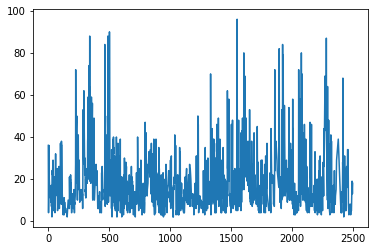

In [668]:
from matplotlib import pyplot as plt
plt.plot(sentence_index, sentence_token_count)

In [669]:
max_count = 0
for tokenSet in sinhala_tokens_set:
    if(len(tokenSet) > max_count):
        max_count = len(tokenSet)
print("Maximum token count before removing stop words:", max_count)

Maximum token count before removing stop words: 96


In [670]:
min_count = 2147483647
for tokenSet in sinhala_tokens_set:
    if(len(tokenSet) < min_count):
        min_count = len(tokenSet)
print("Minimum token count before removing stop words:", min_count)

Minimum token count before removing stop words: 2


In [671]:
max_count = 0
for tokenSet in no_stop_sinhala_set:
    if(len(tokenSet) > max_count):
        max_count = len(tokenSet)
print("Maximum token count after removing stop words:", max_count)

Maximum token count after removing stop words: 86


In [672]:
min_count = 2147483647
for tokenSet in no_stop_sinhala_set:
    if(len(tokenSet) < min_count):
        min_count = len(tokenSet)
print("Minimum token count after removing stop words:", min_count)

Minimum token count after removing stop words: 1


In [673]:
def constructSent(lst):
    return " ".join(lst)
no_stop_sent = []
for lst in no_stop_sinhala_set:
    no_stop_sent.append(constructSent(lst))

In [674]:
no_stop_sent

['‡∂∂‡∑ê‡∂Ω‡∑ä‡∂Ω‡∑í ‡∂ö‡∑ú‡∂ß‡∑í‡∂±‡∑ä‡∂ú‡∑ö ‡∂ú‡∑î ‡∂ö‡∂±‡∂ö‡∑ú‡∂ß ‡∂Ö‡∂¥‡∑Ñ‡∑É‡∑î‡∑Ä‡∂ö‡∑ä ‡∂Ø‡∑ê‡∂±‡∑î‡∂±‡∑ô ‡∂Ø‡∂±‡∑ä ‡∂î‡∂ö‡∑í‡∂ß ‡∂∏‡∑í‡∂±‡∑í‡∑Ñ‡∑è ‡∂∏‡∑ê‡∂ª‡∑î‡∂±‡∂∏ ‡∂Ø‡∑ê‡∂±‡∑î‡∂± ‡∂Ø‡∑î‡∂ö‡∂ß ‡∂Ø‡∑Ñ‡∑É‡∑ä ‡∂ú‡∑î‡∂±‡∂∫‡∂ö ‡∂Ø‡∑î‡∂ö‡∂ö‡∑ä ‡∂Ø‡∑ê‡∂±‡∑ô‡∂±‡∑Ä‡∑è ‡∂â‡∑É‡∑ä‡∑É‡∂ª‡∑Ñ‡∂ß ‡∂ã‡∂¥‡∑É‡∂∏‡∑ä‡∂¥‡∂Ø‡∑è‡∑Ä ‡∂≠‡∑í‡∂∫‡∂± ‡∂∑‡∑í‡∂ö‡∑ä‡∑É‡∑î‡∑Ä‡∂ö‡∑ä ‡∑Ñ‡∑í‡∂ª‡∑ö ‡∂∫‡∑ê‡∑Ä‡∑î‡∑Ä‡∂ß ‡∂î‡∂ö‡∑í ‡∑Ä‡∑ê‡∂©‡∑í‡∂∫‡∑ô‡∂±‡∑ä‡∂∏ ‡∂Ü‡∂Ø‡∂ª‡∑ö ‡∂ö‡∑ô‡∂±‡∑ô‡∂ö‡∑ä ‡∂î‡∂ö‡∑í‡∂ß ‡∂±‡∑ê‡∂≠‡∑í ‡∑Ä‡∑ô‡∂±‡∑Ä‡∑è ‡∑Ä‡∑ê‡∂©‡∑í ‡∂ö‡∂Ω‡∑ä ‡∂±‡∑ú‡∂ú‡∑í‡∑Ñ‡∑í‡∂±‡∑ä',
 '‡∂∏‡∂±‡∑ä ‡∂ä‡∂∫‡∑ö ‡∂∏‡∑î‡∑É‡∑ä‡∂Ω‡∑í‡∂∏‡∑ä ‡∂©‡∑ë‡∂Ω‡∑ä ‡∂ë‡∂ö‡∂ö‡∑ä ‡∑É‡∑ô‡∂Ω‡∑ä‡∑Ü‡∑í‡∂∫‡∂ö‡∑ä ‡∂ú‡∂≠‡∑ä‡∂≠‡∑è ‡∑É‡∑Ñ‡∂¢‡∑ì‡∑Ä‡∂±‡∑ö ‡∂ª‡∑ê‡∂ö‡∂ú‡∑ô‡∂± ‡∂∫‡∂±‡∑ä‡∂± ‡∂å ‡∂í‡∂ö ‡∂≠‡∑è‡∂∏ ‡∂Ø‡∑è‡∂Ω‡∑è ‡∂¥‡∂ª‡∂∫‡∑è',
 '‡∑É‡∂Ç‡∑Ñ‡∑í‡∂Ø‡∑í‡∂∫‡∑è‡∑Ä‡∂ß ‡∂Ö‡∑Ä‡∑î‡∂Ω‡∂ö‡∑ä ‡∑Ä‡∑ô‡∂∫‡∑í',
 '‡∂ö‡∂ß‡∑í‡∂±‡∑ä ‡∂¥‡∑î‡∂ª‡∑É‡∑è‡∂ª‡∂∏‡∑ä ‡∂Ø‡∑ú‡∂©‡∂± ‡∂Ö‡∂¥‡∑í ‡∑É‡∑í‡∂Ç‡∑Ñ‡∂Ω‡∂∫‡∑ú ‡∑Ä‡∑í‡∂Ø‡∑í‡∂∫‡∂ß ‡∂Ω‡∑ê‡∂¢‡∑ä‡∂¢‡∑è ‡∑Ä‡∑í‡∂∫ ‡∂∫‡∑î‡∂≠‡∑î‡∂∫‡∑í',
 

In [675]:
sinhala_df["cleaned_phrase"] = no_stop_sent

In [676]:
sinhala_df

PhraseNo                                             Phrase  \
0            1  ‡∂∏‡∑ö ‡∂∂‡∑ê‡∂Ω‡∑ä‡∂Ω‡∑í ‡∂ö‡∑ú‡∂ß‡∑í‡∂±‡∑ä‡∂ú‡∑ö ‡∂ú‡∑î ‡∂ö‡∂±‡∂ö‡∑ú‡∂ß ‡∂Ö‡∂¥‡∑Ñ‡∑É‡∑î‡∑Ä‡∂ö‡∑ä ‡∂Ø‡∑ê‡∂±‡∑î‡∂±‡∑ô ‡∂±‡∑ê...   
1            2  ‡∂∏‡∂±‡∑ä ‡∂ä‡∂∫‡∑ö ‡∂∏‡∑î‡∑É‡∑ä‡∂Ω‡∑í‡∂∏‡∑ä ‡∂©‡∑ë‡∂Ω‡∑ä ‡∂ë‡∂ö‡∂ö‡∑ä ‡∂ë‡∂ö‡∑ä‡∂ö ‡∑É‡∑ô‡∂Ω‡∑ä‡∑Ü‡∑í‡∂∫‡∂ö‡∑ä ‡∂ú‡∂≠‡∑ä‡∂≠...   
2            3                           ‡∑É‡∂Ç‡∑Ñ‡∑í‡∂Ø‡∑í‡∂∫‡∑è‡∑Ä‡∂ß ‡∂Ö‡∑Ä‡∑î‡∂Ω‡∂ö‡∑ä ‡∑Ä‡∑ô‡∂∫‡∑í ‡∂Ø   
3            4  .‡∂ö‡∂ß‡∑í‡∂±‡∑ä ‡∂¥‡∑î‡∂ª‡∑É‡∑è‡∂ª‡∂∏‡∑ä ‡∂Ø‡∑ú‡∂©‡∂± ‡∂Ö‡∂¥‡∑í ‡∑É‡∑í‡∂Ç‡∑Ñ‡∂Ω‡∂∫‡∑ú ‡∑Ä‡∑í‡∂Ø‡∑í‡∂∫‡∂ß ‡∂Ω‡∑ê‡∂¢‡∑ä‡∂¢‡∑è...   
4            5  ‡∂∏‡∂†‡∂±‡∑ä ‡∂î‡∂∫ ‡∂∏‡∂ú‡∑î‡∂Ω ‡∂±‡∑Ä‡∂≠‡∑ä‡∂≠‡∂Ω‡∑è ‡∂ö‡∑ú‡∂±‡∑ä‡∂Ø‡∂ö‡∑ä ‡∂≠‡∑í‡∂∫‡∑ô‡∂±‡∑Ä‡∑è‡∂±‡∂∏‡∑ä ‡∂¥‡∑î‡∂Ω‡∑î‡∑Ä‡∂±...   
...        ...                                                ...   
2488      2489                      ‡∑Å‡∑ä‚Äç‡∂ª‡∑ì ‡∂Ω‡∑è‡∂Ç‡∂ö‡∑í‡∂ö ‡∂Ø‡∑ö‡∑Å‡∂∫ ‡∑É‡∑î‡∂±‡∑ä‡∂Ø‡∂ª ‡∂ö‡∂ª‡∂∏‡∑î   
2489      2490        ‡∂ï‡∂ö ‡∂ö‡∂Ω‡∑í‡∂±‡∑ä ‡∂Ö‡∂¥‡∑í ‡∂±‡∑ú‡∂Ø‡∂±‡∑ä‡∂± ‡∂Ω‡∂∫‡∑í‡∑Ä‡∑î ‡∂ë‡∂ö‡∑ö ‡∂ú‡∑í‡∂∫ ‡∂ë‡∂ö‡∂ö‡∑ä.....   
2493      2494  ‡∂í‡∂≠‡∑ä ‡∂ë‡∑Ñ‡∑ô‡∂∏ ‡∂ö‡∑í‡∂∫‡∂±‡∑ä‡∂± ‡∂ë‡∂¥‡∑è ‡∂∏‡∂ß ‡∂≠‡∑ö‡∂ª‡∑ê‡∂±‡∑è ‡∂¥‡∑ê‡∑É‡∑ì ‡∂Ö‡∂¥‡∑Ñ‡∑É‡∑î‡∂≠‡∑è‡∑Ä‡∂∫‡∂ß ...   
2496      2497  ‡∂ö‡∑Ä‡∑î‡∂ª‡∑î ‡∂∏‡∑ú‡∂±‡∑è ‡∂ö‡∑í‡∑Ä‡∑ä‡∑Ä‡∂≠‡∑ä.... ‡∂î‡∂∫‡∑è‡∂Ω ‡∂Ø‡∑ô‡∂±‡∑ä‡∂±‡∂ú‡∑ô ‡∂ö‡∂ß‡∑Ä‡∂Ω‡∑ä ‡∂Ø‡∑ô‡∂ö‡∂ß...   
2498      2499  ‡∂∏‡∑î‡∂±‡∑ä ‡∂Ø‡∑ô‡∂±‡∑ä‡∂± ‡∂≠‡∂∏‡∂∫‡∑í ‡∂ª‡∑ô‡∂©‡∑í‡∂∫‡∑ù ‡∂ë‡∂ö‡∑ö ‡∑É‡∑î‡∂¥‡∑í‡∂ª‡∑í ‡∂©‡∂∂‡∂Ω..‡∑Ñ‡∑í‡∂ª‡∑î ‡∂â‡∂±...   

     IsHateSpeech                                     cleaned_phrase  
0             YES  ‡∂∂‡∑ê‡∂Ω‡∑ä‡∂Ω‡∑í ‡∂ö‡∑ú‡∂ß‡∑í‡∂±‡∑ä‡∂ú‡∑ö ‡∂ú‡∑î ‡∂ö‡∂±‡∂ö‡∑ú‡∂ß ‡∂Ö‡∂¥‡∑Ñ‡∑É‡∑î‡∑Ä‡∂ö‡∑ä ‡∂Ø‡∑ê‡∂±‡∑î‡∂±‡∑ô ‡∂Ø‡∂±‡∑ä ‡∂î...  
1             YES  ‡∂∏‡∂±‡∑ä ‡∂ä‡∂∫‡∑ö ‡∂∏‡∑î‡∑É‡∑ä‡∂Ω‡∑í‡∂∏‡∑ä ‡∂©‡∑ë‡∂Ω‡∑ä ‡∂ë‡∂ö‡∂ö‡∑ä ‡∑É‡∑ô‡∂Ω‡∑ä‡∑Ü‡∑í‡∂∫‡∂ö‡∑ä ‡∂ú‡∂≠‡∑ä‡∂≠‡∑è ‡∑É‡∑Ñ‡∂¢...  
2              NO                             ‡∑É‡∂Ç‡∑Ñ‡∑í‡∂Ø‡∑í‡∂∫‡∑è‡∑Ä‡∂ß ‡∂Ö‡∑Ä‡∑î‡∂Ω‡∂ö‡∑ä ‡∑Ä‡∑ô‡∂∫‡∑í  
3             YES  ‡∂ö‡∂ß‡∑í‡∂±‡∑ä ‡∂¥‡∑î‡∂ª‡∑É‡∑è‡∂ª‡∂∏‡∑ä ‡∂Ø‡∑ú‡∂©‡∂± ‡∂Ö‡∂¥‡∑í ‡∑É‡∑í‡∂Ç‡∑Ñ‡∂Ω‡∂∫‡∑ú ‡∑Ä‡∑í‡∂Ø‡∑í‡∂∫‡∂ß ‡∂Ω‡∑ê‡∂¢‡∑ä‡∂¢‡∑è ...  
4             YES  ‡∂∏‡∂†‡∂±‡∑ä ‡∂∏‡∂ú‡∑î‡∂Ω ‡∂±‡∑Ä‡∂≠‡∑ä‡∂≠‡∂Ω‡∑è ‡∂ö‡∑ú‡∂±‡∑ä‡∂Ø‡∂ö‡∑ä ‡∂≠‡∑í‡∂∫‡∑ô‡∂±‡∑Ä‡∑è‡∂±‡∂∏‡∑ä ‡∂¥‡∑î‡∂Ω‡∑î‡∑Ä‡∂±‡∑ä‡∂±‡∂∏...  
...           ...                                                ...  
2488           NO                      ‡∑Å‡∑ä‚Äç‡∂ª‡∑ì ‡∂Ω‡∑è‡∂Ç‡∂ö‡∑í‡∂ö ‡∂Ø‡∑ö‡∑Å‡∂∫ ‡∑É‡∑î‡∂±‡∑ä‡∂Ø‡∂ª ‡∂ö‡∂ª‡∂∏‡∑î  
2489           NO             ‡∂ï‡∂ö ‡∂ö‡∂Ω‡∑í‡∂±‡∑ä ‡∂Ö‡∂¥‡∑í ‡∂±‡∑ú‡∂Ø‡∂±‡∑ä‡∂± ‡∂Ω‡∂∫‡∑í‡∑Ä‡∑î ‡∂ë‡∂ö‡∑ö ‡∂ú‡∑í‡∂∫ ‡∂ë‡∂ö‡∂ö‡∑ä  
2493           NO  ‡∂ë‡∑Ñ‡∑ô‡∂∏ ‡∂ö‡∑í‡∂∫‡∂±‡∑ä‡∂± ‡∂∏‡∂ß ‡∂≠‡∑ö‡∂ª‡∑ê‡∂±‡∑è ‡∂¥‡∑ê‡∑É‡∑ì ‡∂Ö‡∂¥‡∑Ñ‡∑É‡∑î‡∂≠‡∑è‡∑Ä‡∂∫‡∂ß ‡∂¥‡∂≠‡∑ä‡∑Ä‡∑î‡∂±‡∑è ...  
2496           NO  ‡∂∏‡∑ú‡∂±‡∑è ‡∂ö‡∑í‡∑Ä‡∑ä‡∑Ä‡∂≠‡∑ä ‡∂î‡∂∫‡∑è‡∂Ω ‡∂Ø‡∑ô‡∂±‡∑ä‡∂±‡∂ú‡∑ô ‡∂ö‡∂ß‡∑Ä‡∂Ω‡∑ä ‡∂Ø‡∑ô‡∂ö‡∂ß ‡∂ú‡∑Ñ‡∂±‡∑ä‡∂± ‡∂Ω‡∂Ç‡∂ö...  
2498           NO  ‡∂∏‡∑î‡∂±‡∑ä ‡∂Ø‡∑ô‡∂±‡∑ä‡∂± ‡∂ª‡∑ô‡∂©‡∑í‡∂∫‡∑ù ‡∂ë‡∂ö‡∑ö ‡∑É‡∑î‡∂¥‡∑í‡∂ª‡∑í ‡∂©‡∂∂‡∂Ω ‡∑Ñ‡∑í‡∂ª‡∑î ‡∂â‡∂±‡∑ä‡∂± ‡∂ö‡∑è‡∂Ω...  

[1450 rows x 4 columns]

- After removing the stopwords the total number of tokens have reduces
- After removing the stopwords the total number of unique tokens have reduces
- After removing the stopwords the maximum sentence length has reduced
- After removing the stopwords the minimum sentence length has reduced

### Answer (c)

Any pre-text explaining the code below...

In [677]:
# bag of words
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
sinhala_bag_of_words_X = vectorizer.fit_transform(list(sinhala_df["cleaned_phrase"]))
singlish_bag_of_words_X = vectorizer.fit_transform(list(singlish_df["cleaned_phrase"]))

In [678]:
sinhala_bag_of_words_y = list(sinhala_df.IsHateSpeech)
singlish_bag_of_words_y = list(singlish_df.IsHateSpeech)

In [679]:
# encoding labels
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
sinhala_bag_of_words_y = le.fit_transform(sinhala_bag_of_words_y)
singlish_bag_of_words_y = le.fit_transform(singlish_bag_of_words_y)

In [680]:
# train test split
from sklearn.model_selection import train_test_split

# sinhala dataset
X_train_sinhala, X_test_sinhala, y_train_sinhala, y_test_sinhala = train_test_split(sinhala_bag_of_words_X, sinhala_bag_of_words_y, test_size=0.2, random_state=42)

In [681]:
# singlish dataset
X_train_singlish, X_test_singlish, y_train_singlish, y_test_singlish = train_test_split(singlish_bag_of_words_X, singlish_bag_of_words_y, test_size=0.2, random_state=42)

In [682]:
# Logistic Regression Model for sinhala
from sklearn.linear_model import LogisticRegression
logreg_sinhala = LogisticRegression()
logreg_sinhala.fit(X_train_sinhala, y_train_sinhala)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [683]:
sinhala_prediction = logreg_sinhala.predict(X_test_sinhala)

In [684]:
print("Accuracy for sinhala dataset:", logreg_sinhala.score(X_test_sinhala, y_test_sinhala))

Accuracy for sinhala dataset: 0.7


In [685]:
# precision, recall and fscore
from sklearn.metrics import precision_recall_fscore_support
p, r, f, s =  precision_recall_fscore_support(y_test_sinhala, sinhala_prediction, average='macro')
print("Precision for sinhala dataset:", p)
print("Recall for sinhala dataset:", r)
print("F score for sinhala dataset:", f)

Precision for sinhala dataset: 0.7070707070707071
Recall for sinhala dataset: 0.695340416408595
F score for sinhala dataset: 0.6938812652422379


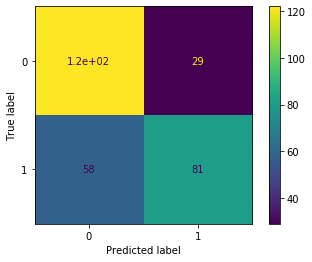

In [686]:
# confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logreg_sinhala, X_test_sinhala, y_test_sinhala)

In [687]:
# Logistic Regression Model for singlish
from sklearn.linear_model import LogisticRegression
logreg_singlish = LogisticRegression()
logreg_singlish.fit(X_train_singlish, y_train_singlish)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [688]:
singlish_prediction = logreg_singlish.predict(X_test_singlish)

In [689]:
print("Accuracy for singlish dataset:", logreg_singlish.score(X_test_singlish, y_test_singlish))

Accuracy for singlish dataset: 0.6428571428571429


In [690]:
p, r, f, s =  precision_recall_fscore_support(y_test_singlish, singlish_prediction, average='macro')
print("Precision for singlish dataset:", p)
print("Recall for singlish dataset:", r)
print("F score for singlish dataset:", f)

Precision for singlish dataset: 0.6360544217687074
Recall for singlish dataset: 0.6166666666666667
F score for singlish dataset: 0.6144525225820665


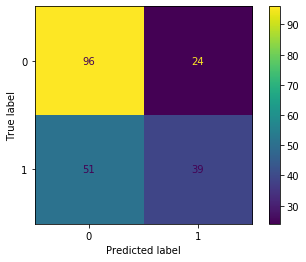

In [691]:
# confusion matrix
plot_confusion_matrix(logreg_singlish, X_test_singlish, y_test_singlish)

In [594]:
# find the most important tokens

Any post-text explaining the result obtained...

### Answer (d)

Any pre-text explaining the code below...

In [735]:
# merge 2 datasets
sets = [singlish_df, sinhala_df]
data = pd.concat(sets)

In [736]:
from sklearn.utils import shuffle
data = shuffle(data)
data

PhraseNo                                             Phrase  \
598        599  ‡∂±‡∑î‡∑Ä‡∂ª ‡∂ö‡∑ú‡∂Ω‡∑ä‡∂Ω‡∑ù ‡∂â‡∂±‡∑ä‡∂±‡∑Ä‡∂±‡∂∏‡∑ä ‡∂∏‡∂ß‡∂≠‡∑ä ‡∑É‡∂¥‡∑ù‡∂ß‡∑ä ‡∂ë‡∂ö‡∂ö‡∑ä ‡∂ï‡∂±‡∑í...‡∂Ω‡∑ú‡∂ö...   
17          18  ‡∂ª‡∂ß ‡∑Ñ‡∂Ø‡∂±‡∑ä‡∂± ‡∂ï‡∂±‡∑ö ‡∂±‡∂∏‡∑ä ‡∂ë‡∂±‡∑ä‡∂¢‡∑ì‡∂ï ‡∂ú‡∑ê‡∂ß ‡∑Ä‡∂Ω‡∑í‡∂±‡∑ä ‡∂∏‡∑í‡∂Ø‡∑ì ‡∂ú‡∑ô‡∂Ø‡∂ª‡∂ß ‡∑Ä...   
2333      2334  ‡∂ë‡∂ö‡∑í ‡∂Ö‡∂ª‡∑î‡∂ß ‡∂ö‡∑í‡∂∫‡∂Ω‡∑è ‡∂á‡∂ª‡∂ú‡∑ö‡∂± ‡∂Ø‡∑ê‡∂±‡∑ä ‡∂ë‡∂±‡∑Ä‡∑è so so kiyann .‡∂Ö...   
1752      1753  ‡∂ã‡∂±‡∑ä‡∂ß ‡∂¥‡∑í‡∑É‡∑ä‡∑É‡∑î ‡∂±‡∑ë .... ‡∂î‡∑Ä‡∑è ‡∂∂‡∂Ω‡∂±‡∑ä ‡∂â‡∂±‡∑ä‡∂± ‡∂Ö‡∂¥‡∑í‡∂ß ‡∂¥‡∑í‡∑É‡∑ä‡∑É‡∑î ...   
488        489  ‡∑Ñ‡∑É‡∑í‡∂±‡∑í ‡∑Ñ‡∂ª‡∑í ‡∂Ø‡∑ô‡∂∫‡∂ö‡∑ä ‡∂ö‡∑í‡∑Ä‡∑î‡∑Ä‡∑è ‡∂∏‡∑ú‡∂±‡∑è ‡∂ã‡∂±‡∂≠‡∑ä . ‡∑Ñ‡∑É‡∑í‡∂±‡∑í‡∑Ä ‡∑É‡∑ê‡∂ö ...   
...        ...                                                ...   
2456      2457  ‡∂ö‡∂ª‡∑î‡∂±‡∑è‡∂ö‡∂ª ‡∂∏‡∑ö ‡∑Ä‡∂ú‡∑ö ‡∑Ñ‡∑í‡∂ü‡∂± ‡∂∏‡∑è‡∂±‡∑É‡∑í‡∂ö‡∂≠‡∑ä‡∑Ä‡∂∫‡∂ö‡∑ä ‡∂≠‡∑í‡∂∂‡∑ô‡∂± ‡∂ã‡∂±‡∑ä ‡∑Ä‡∑ô‡∂±...   
660        661  like anek ratawala ehema unath lankawe ehema w...   
1801      1802  mun hari asawen inne adagahapu gaman sari gala...   
979        980  ‡∑É‡∑î‡∂Ø‡∑î ‡∂á‡∂Ø‡∂ú‡∑ô‡∂± ‡∂Ö‡∂±‡∑ä‡∂≠‡∑í‡∂∏‡∂ß ‡∂ë‡∂± ‡∂ö‡∑ô‡∂±‡∑è‡∑Ä ‡∂∂‡∂Ω‡∂±‡∑ä‡∂±, ‡∂∏‡∑ô‡∂ö ‡∂≠‡∂±‡∑í‡∂ö‡∂ª ‡∂∂...   
1792      1793  ‡∂∏‡∑ö‡∂ö ‡∂∂‡∑ú‡∂ª‡∑î ‡∂ö‡∑í‡∂∫‡∂± ‡∂ã‡∂±‡∑ä‡∂ß ‡∂¥‡∑ú‡∂±‡∑ä‡∂±‡∂∫‡∂∫‡∑ô‡∂ö‡∑ä ‡∂Ø‡∂∏‡∑ä‡∂∏ ‡∂ú‡∑É‡∑ä‡∑É‡∂±‡∑ä‡∂±‡∂Ø ‡∂Ö ...   

     IsHateSpeech                                     cleaned_phrase  
598            NO  ‡∂±‡∑î‡∑Ä‡∂ª ‡∂ö‡∑ú‡∂Ω‡∑ä‡∂Ω‡∑ù ‡∂â‡∂±‡∑ä‡∂±‡∑Ä‡∂±‡∂∏‡∑ä ‡∂∏‡∂ß‡∂≠‡∑ä ‡∑É‡∂¥‡∑ù‡∂ß‡∑ä ‡∂ë‡∂ö‡∂ö‡∑ä ‡∂ï‡∂±‡∑í ‡∂Ω‡∑ú‡∂ö‡∑î ...  
17            YES   ‡∂ª‡∂ß ‡∑Ñ‡∂Ø‡∂±‡∑ä‡∂± ‡∂ï‡∂±‡∑ö ‡∂ë‡∂±‡∑ä‡∂¢‡∑ì‡∂ï ‡∂ú‡∑ê‡∂ß ‡∑Ä‡∂Ω‡∑í‡∂±‡∑ä ‡∂∏‡∑í‡∂Ø‡∑ì ‡∂ú‡∑ô‡∂Ø‡∂ª‡∂ß ‡∑Ä‡∑ì ‡∂â‡∂±‡∑ä‡∂±  
2333          YES  ‡∂ë‡∂ö‡∑í ‡∂Ö‡∂ª‡∑î‡∂ß ‡∂ö‡∑í‡∂∫‡∂Ω‡∑è ‡∂á‡∂ª‡∂ú‡∑ö‡∂± ‡∂Ø‡∑ê‡∂±‡∑ä ‡∂ë‡∂±‡∑Ä‡∑è so so kiyann  ‡∂Ö...  
1752          YES  ‡∂ã‡∂±‡∑ä‡∂ß ‡∂¥‡∑í‡∑É‡∑ä‡∑É‡∑î ‡∂î‡∑Ä‡∑è ‡∂∂‡∂Ω‡∂±‡∑ä ‡∂â‡∂±‡∑ä‡∂± ‡∂Ö‡∂¥‡∑í‡∂ß ‡∂¥‡∑í‡∑É‡∑ä‡∑É‡∑î ‡∂á‡∂∏‡∑ê‡∂≠‡∑í ‡∑Ä‡∂ª...  
488           YES  ‡∑Ñ‡∑É‡∑í‡∂±‡∑í ‡∂Ø‡∑ô‡∂∫‡∂ö‡∑ä ‡∂ö‡∑í‡∑Ä‡∑î‡∑Ä‡∑è ‡∂∏‡∑ú‡∂±‡∑è ‡∂ã‡∂±‡∂≠‡∑ä ‡∑Ñ‡∑É‡∑í‡∂±‡∑í‡∑Ä ‡∑É‡∑ê‡∂ö ‡∂ö‡∂ª‡∂±‡∑ä‡∂± ...  
...           ...                                                ...  
2456           NO  ‡∂ö‡∂ª‡∑î‡∂±‡∑è‡∂ö‡∂ª ‡∑Ñ‡∑í‡∂ü‡∂± ‡∂∏‡∑è‡∂±‡∑É‡∑í‡∂ö‡∂≠‡∑ä‡∑Ä‡∂∫‡∂ö‡∑ä ‡∂≠‡∑í‡∂∂‡∑ô‡∂± ‡∂ã‡∂±‡∑ä ‡∂ö‡∂≠‡∑è ‡∂±‡∑ú‡∂ö‡∂ª ‡∑É...  
660            NO  like anek ratawala ehema unath lankawe ehema w...  
1801          YES  mun hari asawen inne adagahapu gaman sari gala...  
979            NO  ‡∑É‡∑î‡∂Ø‡∑î ‡∂á‡∂Ø‡∂ú‡∑ô‡∂± ‡∂Ö‡∂±‡∑ä‡∂≠‡∑í‡∂∏‡∂ß ‡∂ë‡∂± ‡∂ö‡∑ô‡∂±‡∑è‡∑Ä ‡∂∂‡∂Ω‡∂±‡∑ä‡∂± ‡∂∏‡∑ô‡∂ö ‡∂≠‡∂±‡∑í‡∂ö‡∂ª ‡∂∂‡∑ú...  
1792          YES  ‡∂∏‡∑ö‡∂ö ‡∂∂‡∑ú‡∂ª‡∑î ‡∂ö‡∑í‡∂∫‡∂± ‡∂ã‡∂±‡∑ä‡∂ß ‡∂¥‡∑ú‡∂±‡∑ä‡∂±‡∂∫‡∂∫‡∑ô‡∂ö‡∑ä ‡∂Ø‡∂∏‡∑ä‡∂∏ ‡∂ú‡∑É‡∑ä‡∑É‡∂±‡∑ä‡∂±‡∂Ø ‡∂Ö ...  

[2500 rows x 4 columns]

In [737]:
X = data.cleaned_phrase
y = data.IsHateSpeech

In [738]:
X = vectorizer.fit_transform(list(X))
y = le.fit_transform(list(y))

In [739]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [740]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [741]:
model_prediction = model.predict(X_test)

In [742]:
print("Model accuracy:", model.score(X_test, y_test))

Model accuracy: 0.69


In [743]:
p, r, f, s =  precision_recall_fscore_support(y_test, model_prediction, average='macro')
print("Precision:", p)
print("Recall:", r)
print("F score:", f)

Precision: 0.7083206494165398
Recall: 0.6663263983407868
F score: 0.6623843938819696


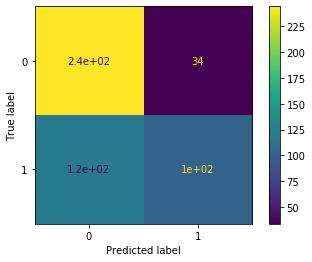

In [744]:
# confusion matrix
plot_confusion_matrix(model, X_test, y_test)

- Having a single dataset has the better accuracy

### Answer (e)

Any pre-text explaining the code below...

In [745]:
# apply tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [746]:
X = list(data.cleaned_phrase)

In [751]:
X = vectorizer.fit_transform(X)

In [752]:
cross_val_model = LogisticRegression()

In [758]:
# cross validation accuracy
from sklearn.model_selection import cross_val_score
cross_val_acc = cross_val_score(cross_val_model, X, y, cv=10)
cross_val_acc

array([0.7  , 0.724, 0.708, 0.704, 0.712, 0.72 , 0.74 , 0.684, 0.672,
       0.692])

In [759]:
print("Average accuracy in cross validation:", sum(cross_val_acc)/len(cross_val_acc))

Average accuracy in cross validation: 0.7055999999999999


In [763]:
cross_val_precision = cross_val_score(cross_val_model, X, y, cv=10, scoring="precision")
cross_val_precision

array([0.74647887, 0.75308642, 0.80327869, 0.75714286, 0.76388889,
       0.75      , 0.82608696, 0.72857143, 0.75438596, 0.70731707])

In [764]:
print("Average precision in cross validation:", sum(cross_val_precision)/len(cross_val_precision))

Average precision in cross validation: 0.759023715072504


Any post-text explaining the result obtained...

### Answer (f)

Any pre-text explaining the code below...

In [6]:
# Insert code for part (f)

Any post-text explaining the result obtained...

### Answer (g)

Insert text description for this part here